# Notebook 3: Dealing with Multicolinearity

Before trying to change the model, we want to reduce the data set we are using. A common heuristic recommends 10 data points per feature for regression. Additionaly, we have similar and thus highly correlated features. Therefore, we decided to reduce the number of features from 120 to 15-30. 

We tried two different criteria for selecting remaining features: the total amount of correlation and the Variance inflation factor (VIF).

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob
import pandas as pd
import sklearn
from src import ana_utils as utils
import collections
import scipy.stats


#np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression

np.random.seed(7)

Import datasets that were preprocessed in Notebook 1

In [9]:
wb_data = pd.read_csv("data/wb_data.csv", index_col="Country Name")
wb_data_short = pd.read_csv("data/wb_data_short.csv", index_col="Country Name")
whr_data = pd.read_csv("data/whr_data.csv", index_col="Country name")

### Pearson correlation coefficient analysis

First, we wanted to get a first impression of the amount of multicolinearity present in the data. Therefore, we looked at the correlation coefficient of each indicator pair.

NameError: name 'df' is not defined

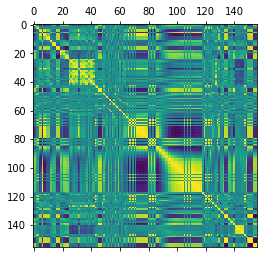

<Figure size 1368x1080 with 0 Axes>

In [14]:
indicator_corr = wb_data.corr(method="pearson")

f = plt.figure(figsize=(19, 15))
plt.matshow(indicator_corr, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);


In [6]:
#We build a function that prints all correlated pairs above a certain threshold
threshold = 0.85
corr_dict = utils.corr_counter(indicator_corr)

corr_dict_sorted = sorted(corr_dict.items(), key=lambda x: x[1], reverse=True) 

#corr_dict_sorted
#indicators_sorted_by_corr = sorted(corr_dict, key=corr_dict.get)

#TODO ? visualize
max(corr_dict, key=corr_dict.get)

'Population ages 10-14, female (% of female population)'

In [4]:
def pearsons_reduction(data, target_size): 
    reduced_data = data.copy(deep=True)
    remove_limit = len(data.columns) - target_size
    
    for i in range(0, remove_limit):
        indicator_corr = reduced_data.corr(method="pearson")
        corr_dict = utils.corr_counter(indicator_corr)

        most_correlated_indicator = max(corr_dict, key=corr_dict.get)
        #print(max(corr_dict.values()))
        reduced_data.drop(columns=most_correlated_indicator, inplace=True)

    return reduced_data

reduced_wb_data = pearsons_reduction(wb_data, 40)
reduced_wb_data.columns

Index(['Adjusted savings: energy depletion (current US$)',
       'Adjusted savings: mineral depletion (current US$)',
       'Contributing family workers, male (% of male employment) (modeled ILO estimate)',
       'Employers, female (% of female employment) (modeled ILO estimate)',
       'Employers, male (% of male employment) (modeled ILO estimate)',
       'Employers, total (% of total employment) (modeled ILO estimate)',
       'Employment in industry, female (% of female employment) (modeled ILO estimate)',
       'Incidence of tuberculosis (per 100,000 people)',
       'Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Labor force, total', 'Land area (sq. km)',
       'Lower secondary school starting age (years)',
       'Merchandise exports by the reporting economy, residual (% of total merchandise exports)',
       'Merchandise expor

#Upon further research, we find that instead of removing redundancies

In [5]:

def vif_reduction(data, drop_batch, target_size):
    reduced_data = data.copy(deep=True)
    iterations = round((len(data.columns) - target_size) / drop_batch)
    
    for i in range(0, iterations):
        wb_vif = utils.sklearn_vif(reduced_data.columns, reduced_data)

        drop_list = list(wb_vif["VIF"].sort_values()[-drop_batch:].index)
        reduced_data.drop(columns=drop_list, inplace=True)

    return reduced_data

wb_data_vif_red = vif_reduction(wb_data, 1, 30)
print(wb_data_vif_red.shape)

c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\Git

(150, 30)


In [6]:
#utils.sklearn_vif(wb_data_cc.columns, wb_data_cc)
wb_vif = utils.sklearn_vif(wb_data.columns, wb_data)
drop_list = list(wb_vif["VIF"].sort_values()[15:156].index)
wb_data_cc = wb_data.drop(columns=drop_list)

c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\GitHub\Data-Literacy-project\src\ana_utils.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
c:\Users\samue\Documents\Git

In [7]:
# lets remove sex ratio lol
#wb_data_cc = wb_data_cc.drop("Sex ratio at birth (male births per female births)", axis=1)

In [12]:
least_squares = sklearn.linear_model.LinearRegression()
ridge = sklearn.linear_model.Ridge()


In [21]:

# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(5000, wb_data, whr_scores, 30, "normalize", least_squares)

print("Mean loss:", mean_loss)
print("The average size of the first ten coefficients:", avg_coefs[:10])

Mean loss: 0.36796328931791394
The average size of the first ten coefficients: [ 0.3015  0.1393  0.2046  0.1853 -0.1202 -0.1397  0.2443 -0.2611 -0.2187
 -0.6897]
